# MSc AI – SIS6117 [Assignment 1]

# 2423119 SUMMUN Roshan

### CASE STUDY 2 – Machine Learning: Classfication Models 

### Install and import required libraries if not already installed

In [435]:
import warnings
warnings.filterwarnings('ignore')

# !pip install pandas numpy matplotlib seaborn scikit-learn

Import Libraries


In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_columns', None) # display all columns in DataFrame output

# Exploratory Data Analysis (EDA)


Load and Display data


In [437]:
df = pd.read_csv('weatherAUS.csv')
print("Dataset Shape:", df.shape)

Dataset Shape: (145460, 23)


In [438]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [439]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


See unique values in RainToday and RainTomorrow (Target) columns

In [440]:
# See unique values in RainToday and RainTomorrow columns
print("RainToday:", df['RainToday'].unique())
print("RainTomorrow:", df['RainTomorrow'].unique())

RainToday: ['No' 'Yes' nan]
RainTomorrow: ['No' 'Yes' nan]


Check for missing values


Missing values:
               Missing Values Data Type
Date                        0     int64
Location                    0     int64
MinTemp                     0   float64
MaxTemp                     0   float64
Rainfall                    0   float64
Evaporation                 0   float64
Sunshine                    0   float64
WindGustDir                 0     int64
WindGustSpeed               0   float64
WindDir9am                  0     int64
WindDir3pm                  0     int64
WindSpeed9am                0   float64
WindSpeed3pm                0   float64
Humidity9am                 0   float64
Humidity3pm                 0   float64
Pressure9am                 0   float64
Pressure3pm                 0   float64
Cloud9am                    0   float64
Cloud3pm                    0   float64
Temp9am                     0   float64
Temp3pm                     0   float64
RainToday                   0   float64
RainTomorrow                0   float64


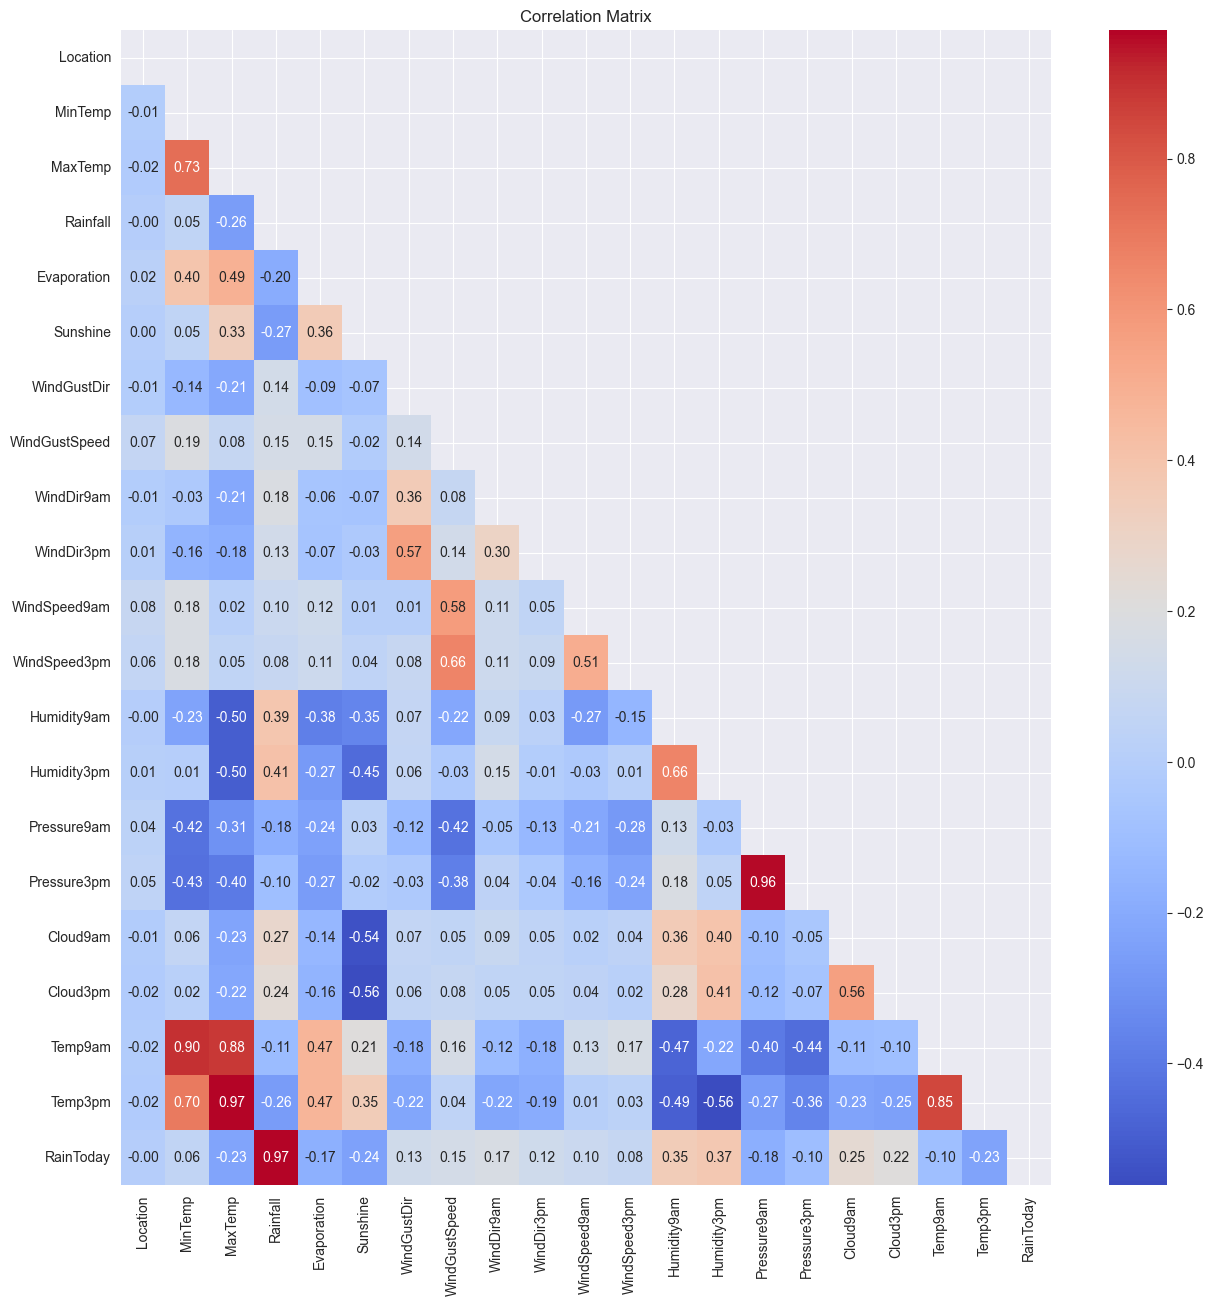

In [457]:
def check_missing_values(df):
    print("\nMissing values:")
    missing_values = df.isnull().sum()
    data_types = df.dtypes
    
    # print as a dataframe
    missing_df = pd.concat([missing_values, data_types], axis=1)
    missing_df.columns = ['Missing Values', 'Data Type']
    print(missing_df)
    
    # Correlation matrix
    corr = df.drop(['RainTomorrow', 'Date'], axis=1).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()
        
check_missing_values(df)

# Data Preprocessing

Convert 'Yes' and 'No' to 1 and 0 in RainToday and RainTomorrow

In [442]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

Check the changes

In [443]:
print(df['RainToday'].value_counts())
print("\n",df['RainTomorrow'].value_counts())

RainToday
0.0    110319
1.0     31880
Name: count, dtype: int64

 RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64


Get numerical and categorical columns

In [444]:
# create a dataframe with numerical columns and categorical columns
contin = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[object]).columns

print( "Numerical Columns:\n",contin)
print( "\nCategorical Columns:\n",categorical)

Numerical Columns:
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Categorical Columns:
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


Fill missing values in categorical columns with mode



In [445]:
# Create a dictionary of modes for each categorical column
modes = {column: df[column].mode()[0] for column in categorical}
print('Modes: ', modes)
# Fill missing values using the dictionary
df[categorical] = df[categorical].fillna(modes)

# Check missing values for categorical columns
check_missing_values(df[categorical])

Modes:  {'Date': '2013-03-01', 'Location': 'Canberra', 'WindGustDir': 'W', 'WindDir9am': 'N', 'WindDir3pm': 'SE'}

Missing values:
             Missing Values Data Type
Date                      0    object
Location                  0    object
WindGustDir               0    object
WindDir9am                0    object
WindDir3pm                0    object


Encode categorical columns using Label Encoder

In [446]:
print("Before Encoding:")
df[categorical] # display categorical columns

Before Encoding:


,Date,Location,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,W,W,WNW
1,2008-12-02,Albury,WNW,NNW,WSW
2,2008-12-03,Albury,WSW,W,WSW
3,2008-12-04,Albury,NE,SE,E
4,2008-12-05,Albury,W,ENE,NW
...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE
145456,2017-06-22,Uluru,NNW,SE,N
145457,2017-06-23,Uluru,N,SE,WNW
145458,2017-06-24,Uluru,SE,SSE,N


In [447]:
# Encode categorical columns using label encoder
le = LabelEncoder()
for column in categorical:
    df[column] = le.fit_transform(df[column])

print("After Encoding:")
df[categorical] # display encoded categorical columns

After Encoding:


,Date,Location,WindGustDir,WindDir9am,WindDir3pm
0,396,2,13,13,14
1,397,2,14,6,15
2,398,2,15,13,15
3,399,2,4,9,0
4,400,2,13,1,7
...,...,...,...,...,...
145455,3431,41,0,9,1
145456,3432,41,6,9,3
145457,3433,41,3,9,14
145458,3434,41,9,10,3


Check missing values in numerical columns

In [448]:
# Check missing values for numerical columns with percentage
missing_values = df[contin].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100 
missing_df = pd.concat([missing_values, missing_percentage], axis=1)
missing_df.columns = ['Missing Values', '%']
print(missing_df)

               Missing Values          %
MinTemp                  1485   1.020899
MaxTemp                  1261   0.866905
Rainfall                 3261   2.241853
Evaporation             62790  43.166506
Sunshine                69835  48.009762
WindGustSpeed           10263   7.055548
WindSpeed9am             1767   1.214767
WindSpeed3pm             3062   2.105046
Humidity9am              2654   1.824557
Humidity3pm              4507   3.098446
Pressure9am             15065  10.356799
Pressure3pm             15028  10.331363
Cloud9am                55888  38.421559
Cloud3pm                59358  40.807095
Temp9am                  1767   1.214767
Temp3pm                  3609   2.481094
RainToday                3261   2.241853
RainTomorrow             3267   2.245978


Missing RainToday and RainTomorrow contain only 2%
- Let's drop them

In [449]:
df = df.dropna(subset=['RainToday', 'RainTomorrow'])


Fill missing values in numerical columns with mean

In [450]:
# Create imputer for numerical values
num_imputer = SimpleImputer(strategy='mean')
df[contin] = num_imputer.fit_transform(df[contin]) # fill missing values

check_missing_values(df)



Missing values:
               Missing Values Data Type
Date                        0     int64
Location                    0     int64
MinTemp                     0   float64
MaxTemp                     0   float64
Rainfall                    0   float64
Evaporation                 0   float64
Sunshine                    0   float64
WindGustDir                 0     int64
WindGustSpeed               0   float64
WindDir9am                  0     int64
WindDir3pm                  0     int64
WindSpeed9am                0   float64
WindSpeed3pm                0   float64
Humidity9am                 0   float64
Humidity3pm                 0   float64
Pressure9am                 0   float64
Pressure3pm                 0   float64
Cloud9am                    0   float64
Cloud3pm                    0   float64
Temp9am                     0   float64
Temp3pm                     0   float64
RainToday                   0   float64
RainTomorrow                0   float64


Check for outliers in numerical columns

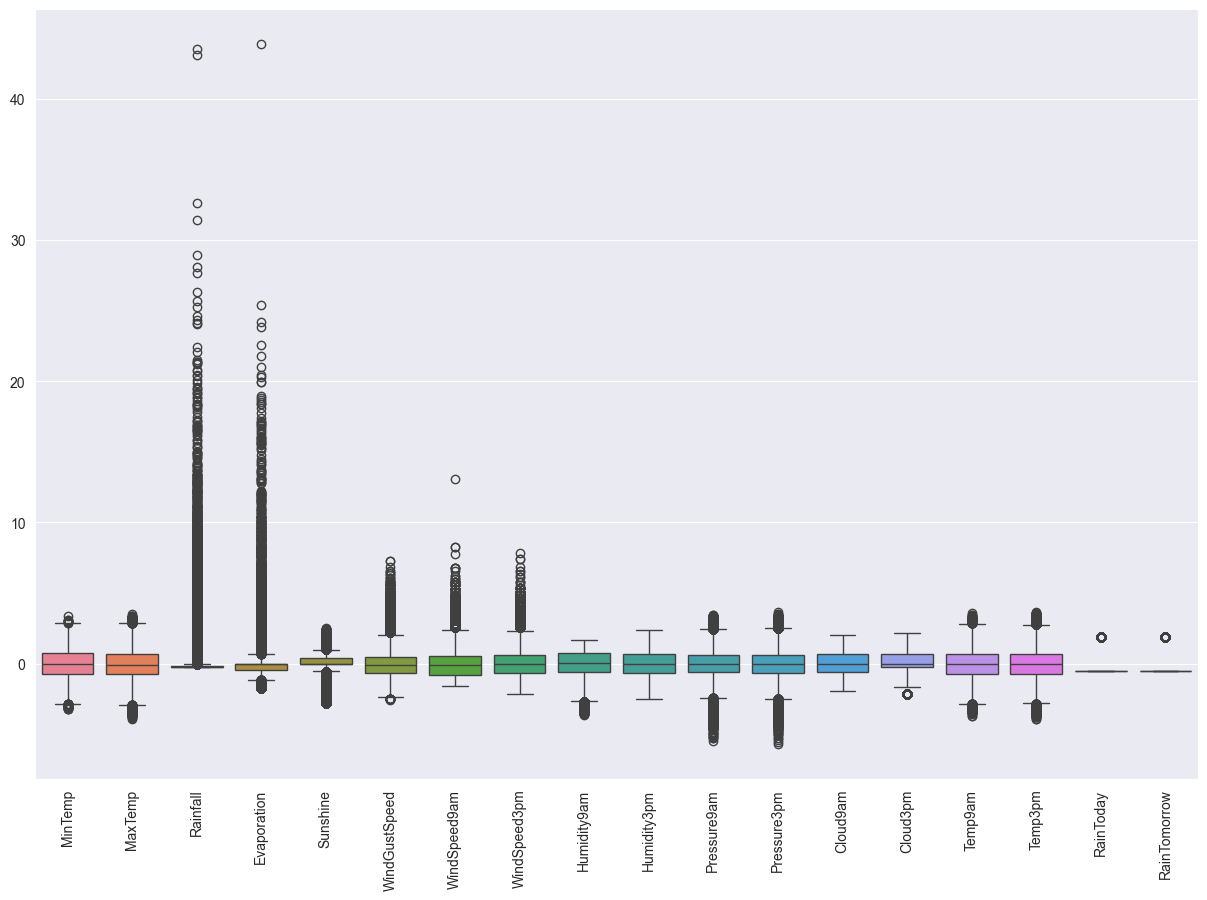

In [451]:
def check_outliers(df):
    # Set up a standard scaler for the features
    scaler = StandardScaler()
    df[contin] = scaler.fit_transform(df[contin])
    
    # Check for outliers in numerical columns
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[contin])
    plt.xticks(rotation=90)
    plt.show()
    
check_outliers(df)


Remove outliers using IQR method in Rainfall, Evaporation, windGustSpeed, windspeed3am, windspeed9am
- Replaces values below lower bound with the lower bound value
- Replaces values above upper bound with the upper bound valuemns

Rainfall: found 25228 outliers
Evaporation: found 29098 outliers
WindGustSpeed: found 5314 outliers
WindSpeed9am: found 2285 outliers
WindSpeed3pm: found 2420 outliers


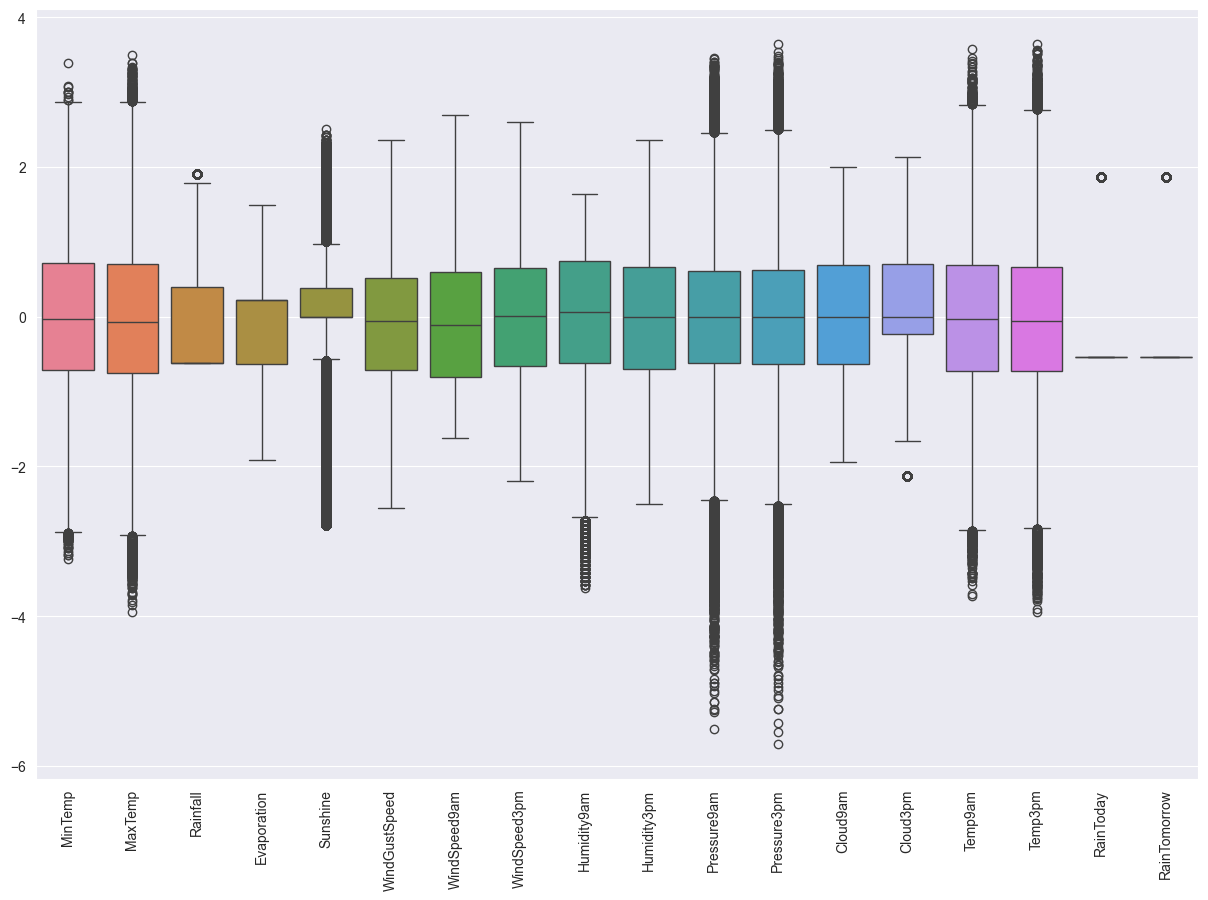

In [452]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Count outliers
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        print(f"{col}: found {outliers} outliers")
        
        # Replace outliers with bounds instead of removing
        df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound  # Replace with lower bound
        df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound  # Replace with upper bound
    
    return df_clean

# Apply to specific columns
df = handle_outliers(df, ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

# Check for outliers in numerical columns
check_outliers(df)
